In [1]:
#Importing the important Libraries
!pip install imblearn

In [2]:
import pandas as pd
from tqdm import tqdm          # progress bar
import numpy as np
import seaborn as sns            
import matplotlib.pyplot as plt
import plotly.express as px     
# from sklearn.metrics import r2_score, mean_squared_error
# from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


from pandas_profiling import ProfileReport
from sklearn import metrics

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn import preprocessing

%matplotlib inline

 #  to use if there are problems exhibitting plotly graphs on Jupyter Notebook:
# import plotly.io as pio
# pio.renderers.default='notebook'
 # or:
    # px.histogram.show("notebook")

In [3]:
#Importing and Loading the dataset
telco_df=pd.read_csv('C:/Users/user/Desktop/LabSessions22-12-2022/churndataset/data/WA_Fn_UseC_Telco-Customer-Churn.csv')

In [4]:
telco_df.head()## We can use this to take a quick look at the dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
telco_df.shape

(7043, 21)

In [7]:
telco_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [107]:
telco_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7028,0,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7029,0,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7030,1,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [8]:
# Changing the Total Charges column from Object to Numeric as it has numeric data

telco_df['TotalCharges']=pd.to_numeric(telco_df['TotalCharges'],errors='coerce')

## Calling the dtype function to confirm the change of the datatype for Total Charges

telco_df['TotalCharges'].dtypes

## The Datatype has been converted to numeric

dtype('float64')

In [105]:
telco_df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [108]:
telco_df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [9]:
telco_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
#Here aboce we can check in the "TotalCharges" we have 11 null values.
#drop null values of Total charges
telco_df = telco_df[telco_df['TotalCharges'].notnull()]
telco_df = telco_df.reset_index()[telco_df.columns]

In [11]:
telco_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
telco_df.duplicated().sum()#here are no Duplicates Values

0

# Checking Corelations

In [13]:
telco_df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


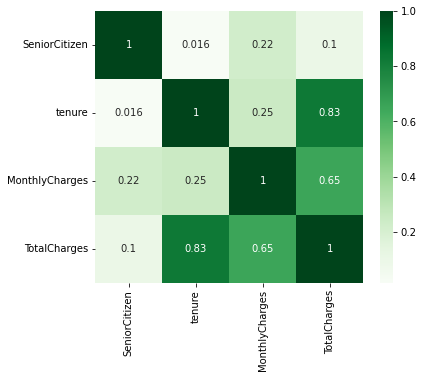

In [14]:
plt.figure(figsize=(6,5))
sns.heatmap(telco_df.corr(), annot = True, cmap = "Greens");

# outlier analysis

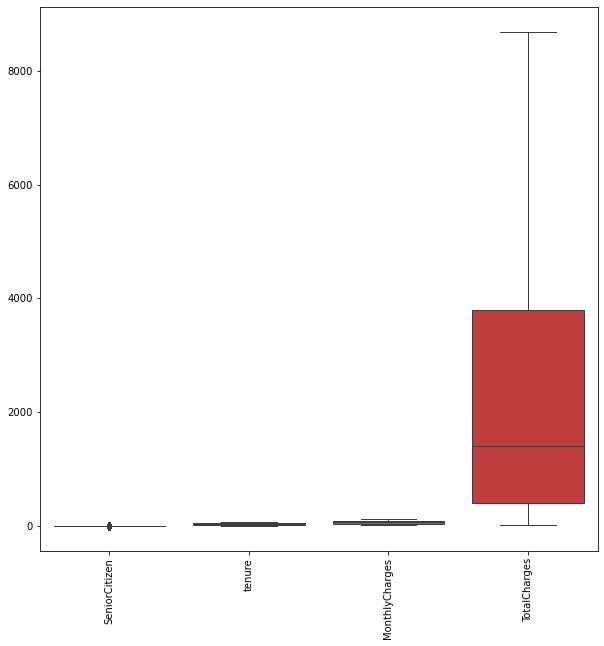

In [15]:
## Outlier Detection
fig= plt.figure(figsize=(10,10))
sns.boxplot(data= telco_df, linewidth=1 )
plt.xticks(rotation='vertical')
plt.show()

# There are no Outliers in the dataset

In [16]:
## We need to take care of the Output i.e. Churn. We need to map the values and cast them to the Columns

churn_map = {'No': 0, 'Yes': 1}
telco_df['Churn'] = telco_df['Churn'].map(churn_map)
telco_df['Churn']

## We can see the values are now in 0's and 1's

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

In [17]:
#from sklearn.preprocessing import LabelEncoder
#label = LabelEncoder()
#telco_df['Churn'] = label.fit_transform(telco_df['Churn'])

In [18]:
telco_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [19]:
## Checking the total number of Categorical Features in the Data

categorical_features=[feature for feature in telco_df.columns if telco_df[feature].dtypes=='O']
print('The total number of Categorical Features are {}'.format(len(categorical_features)))

## We can see that there are 15 categorical features in the data and hence we need to work on them to convert them to numeric

The total number of Categorical Features are 16


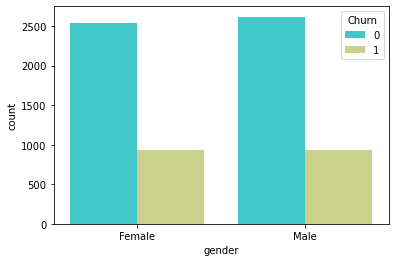

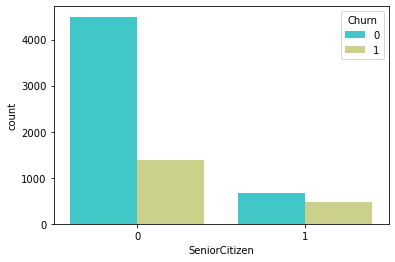

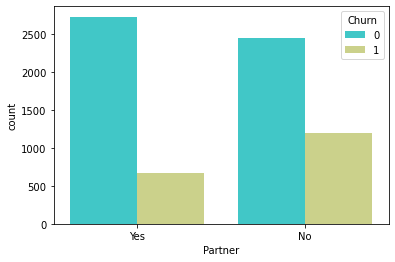

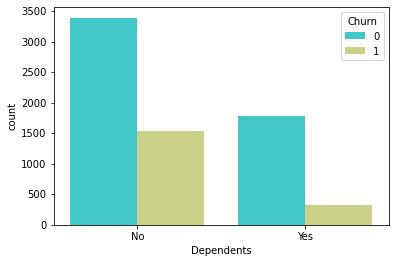

In [20]:
## Customer Information with respect to Churn. 
#Analyzing "gender"

C1=telco_df[['gender','SeniorCitizen','Partner','Dependents']]

for i in C1:
    plt.figure(i)
    sns.countplot(data=telco_df,x=i,hue='Churn',palette='rainbow')

In [21]:
gender=telco_df[telco_df['Churn']==1]['gender'].value_counts()
gender=[gender[0]/sum(gender)*100,gender[1]/sum(gender)*100]

Seniorcitizen=telco_df[telco_df['Churn']==1]['SeniorCitizen'].value_counts()
Seniorcitizen=[Seniorcitizen[0]/sum(Seniorcitizen)*100,Seniorcitizen[1]/sum(Seniorcitizen)*100]

Dependents=telco_df[telco_df['Churn']==1]['Dependents'].value_counts()
Dependents=[Dependents[0]/sum(Dependents)*100,Dependents[1]/sum(Dependents)*100]

Partner=telco_df[telco_df['Churn']==1]['Partner'].value_counts()
Partner=[Partner[0]/sum(Partner)*100,Partner[1]/sum(Partner)*100]

In [22]:
gender

[50.24077046548957, 49.75922953451043]

In [23]:
Seniorcitizen

[74.53183520599251, 25.468164794007492]

In [24]:
Dependents

[82.55751738897807, 17.442482611021937]

In [25]:
Partner

[64.20545746388443, 35.79454253611557]

In [26]:
gender_map = {'Female': 0, 'Male': 1}
telco_df['gender'] = telco_df['gender'].map(gender_map)
telco_df['gender']

0       0
1       1
2       1
3       1
4       0
       ..
7027    1
7028    0
7029    0
7030    1
7031    1
Name: gender, Length: 7032, dtype: int64

# Customer Information with Relation to Churn
After using the group by function we have collated the data for the Customers with regards to if the customers will Churn or not. The below Cell and the pie charts show a visualzation of the same

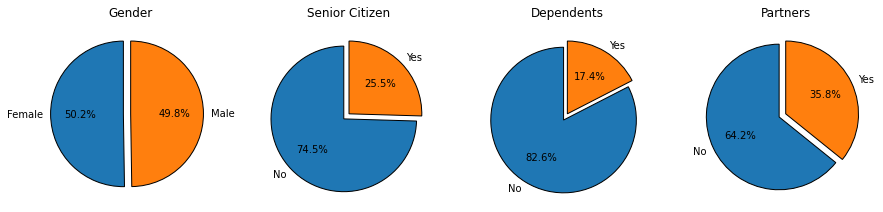

In [27]:
ax,fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))

plt.subplot(1,4,1)
plt.pie(gender,labels = ['Female','Male'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Gender');


plt.subplot(1,4,2)
plt.pie(Seniorcitizen,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Senior Citizen');

plt.subplot(1,4,3)
plt.pie(Dependents,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Dependents');


plt.subplot(1,4,4)
plt.pie(Partner,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Partners');


# Checking to confirm the impact of the services on the Churn
-Summary: There are various services which are being provided. This visualzation and group by is being used to check as to what is the impact of the services being provided and what is the impact if the services are not being provided

In [28]:
# No internet service and No phone service can be grouped as No, so replacing these with 'No'
telco_df.replace('No internet service','No',inplace = True)
telco_df.replace('No phone service','No',inplace=True)

In [29]:
PhoneService=telco_df[telco_df['Churn']==1]['PhoneService'].value_counts()
PhoneService=[PhoneService[0]/sum(PhoneService)*100,PhoneService[1]/sum(PhoneService)*100]

MultipleLines=telco_df[telco_df['Churn']==1]['MultipleLines'].value_counts()
MultipleLines=[MultipleLines[0]/sum(MultipleLines)*100,MultipleLines[1]/sum(MultipleLines)*100]

InternetService=telco_df[telco_df['Churn']==1]['InternetService'].value_counts()
InternetService=[InternetService[0]/sum(InternetService)*100,InternetService[1]/sum(InternetService)*100]

OnlineSecurity=telco_df[telco_df['Churn']==1]['OnlineSecurity'].value_counts()
OnlineSecurity=[OnlineSecurity[0]/sum(OnlineSecurity)*100,OnlineSecurity[1]/sum(OnlineSecurity)*100]

OnlineBackup=telco_df[telco_df['Churn']==1]['OnlineBackup'].value_counts()
OnlineBackup=[OnlineBackup[0]/sum(OnlineBackup)*100,OnlineBackup[1]/sum(OnlineBackup)*100]

DeviceProtection=telco_df[telco_df['Churn']==1]['DeviceProtection'].value_counts()
DeviceProtection=[DeviceProtection[0]/sum(DeviceProtection)*100,DeviceProtection[1]/sum(DeviceProtection)*100]

TechSupport=telco_df[telco_df['Churn']==1]['TechSupport'].value_counts()
TechSupport=[TechSupport[0]/sum(TechSupport)*100,TechSupport[1]/sum(TechSupport)*100]

StreamingTV=telco_df[telco_df['Churn']==1]['StreamingTV'].value_counts()
StreamingTV=[StreamingTV[0]/sum(StreamingTV)*100,StreamingTV[1]/sum(StreamingTV)*100]

StreamingMovies=telco_df[telco_df['Churn']==1]['StreamingMovies'].value_counts()
StreamingMovies=[StreamingMovies[0]/sum(StreamingMovies)*100,StreamingMovies[1]/sum(StreamingMovies)*100]


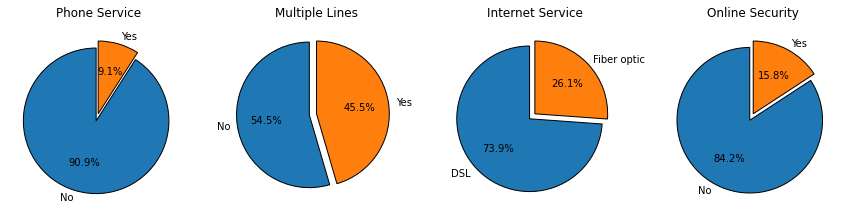

In [30]:
ax,fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))

plt.subplot(1,4,1)
plt.pie(PhoneService,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Phone Service');


plt.subplot(1,4,2)
plt.pie(MultipleLines,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Multiple Lines');

plt.subplot(1,4,3)
plt.pie(InternetService,labels = ['DSL','Fiber optic'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Internet Service');


plt.subplot(1,4,4)
plt.pie(OnlineSecurity,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Online Security');




# Insights from the above Chart
1.We can see that all the services are impacting the customer churn. If the customers are not getting Services then they are likely to churn which is a fact in real world as well

2.Coming to the Internet Services offered we can see that the customers who have DSL are more likely to chrun. So the company should work on moving those customers to Fiber Optic.

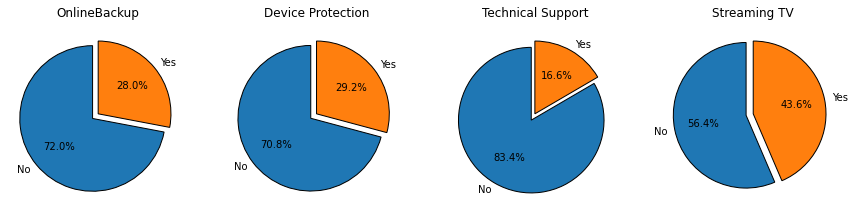

In [31]:
ax,fig = plt.subplots(nrows = 1,ncols = 5,figsize = (15,15))

plt.subplot(1,4,1)
plt.pie(OnlineBackup,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('OnlineBackup');


plt.subplot(1,4,2)
plt.pie(DeviceProtection	,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Device Protection');

plt.subplot(1,4,3)
plt.pie(TechSupport,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Technical Support');


plt.subplot(1,4,4)
plt.pie(StreamingTV,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Streaming TV');

# Coming to the Insights from the above Visualization
We can clearly see that if there are no services which are being provided then high number of customers will be churning.

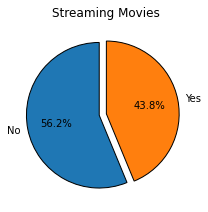

In [32]:
ax,fig = plt.subplots(nrows = 1,ncols = 1,figsize = (15,15))

plt.subplot(1,4,1)
plt.pie(StreamingMovies,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Streaming Movies');

# Brief explanation about the Service
StreamingMovies: Online Streaming of Movies


# Coming to the Insights from the above Visualization
We can see that there is not much of a difference in the customer Leaving or staying with regards to the Streaming Movies but still we have more customer who will chrun if there are no online Streaming Movies

# Payment Information and analysis with respect to Churn
There are columns for Payment related that include Contract,PaymentMethod,Total Charges,Monthly Charges,Paperless Billing for which we will be visualizing the data to understand better.

# Description of the Columns
1.Contract: Whether its a monthly,Yearly or Two-Year and its impact on the Churn
2.PaymentMethod: Various types of payment methods provided and their impact on the churn
3.Paperless Billing: Whether the bills that the customers are receiving are hard copies or else on mails
4.Total Charges: Total charges that are being charged to the customer
5.Monthly Charges : That are charged to the customer

In [33]:
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,1,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [34]:
## Converting all the data to Numeric from Categorical

# Replace Yes with 1 and No with 0
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                 'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']
for col in yes_no_columns:
    telco_df[col].replace({'Yes':1, 'No':0},inplace=True)

In [35]:
telco_df.info()

## The data types of the categorical columns having Yes and No have been converted to Numeric Column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   int64  
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int64  
 4   Dependents        7032 non-null   int64  
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   int64  
 7   MultipleLines     7032 non-null   int64  
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   int64  
 10  OnlineBackup      7032 non-null   int64  
 11  DeviceProtection  7032 non-null   int64  
 12  TechSupport       7032 non-null   int64  
 13  StreamingTV       7032 non-null   int64  
 14  StreamingMovies   7032 non-null   int64  
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   int64  


In [36]:
## Converting the remaining columns by using One Hot Encoding

telco_df_dummies=pd.get_dummies(telco_df,columns=['InternetService','Contract','PaymentMethod'])

In [37]:
telco_df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7032 non-null   object 
 1   gender                                   7032 non-null   int64  
 2   SeniorCitizen                            7032 non-null   int64  
 3   Partner                                  7032 non-null   int64  
 4   Dependents                               7032 non-null   int64  
 5   tenure                                   7032 non-null   int64  
 6   PhoneService                             7032 non-null   int64  
 7   MultipleLines                            7032 non-null   int64  
 8   OnlineSecurity                           7032 non-null   int64  
 9   OnlineBackup                             7032 non-null   int64  
 10  DeviceProtection                         7032 no

In [38]:
telco_df=telco_df_dummies.drop(['customerID'],axis=1)#we'll drop column "customerID", since it wont' impact anything

In [39]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 no

In [40]:
telco_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


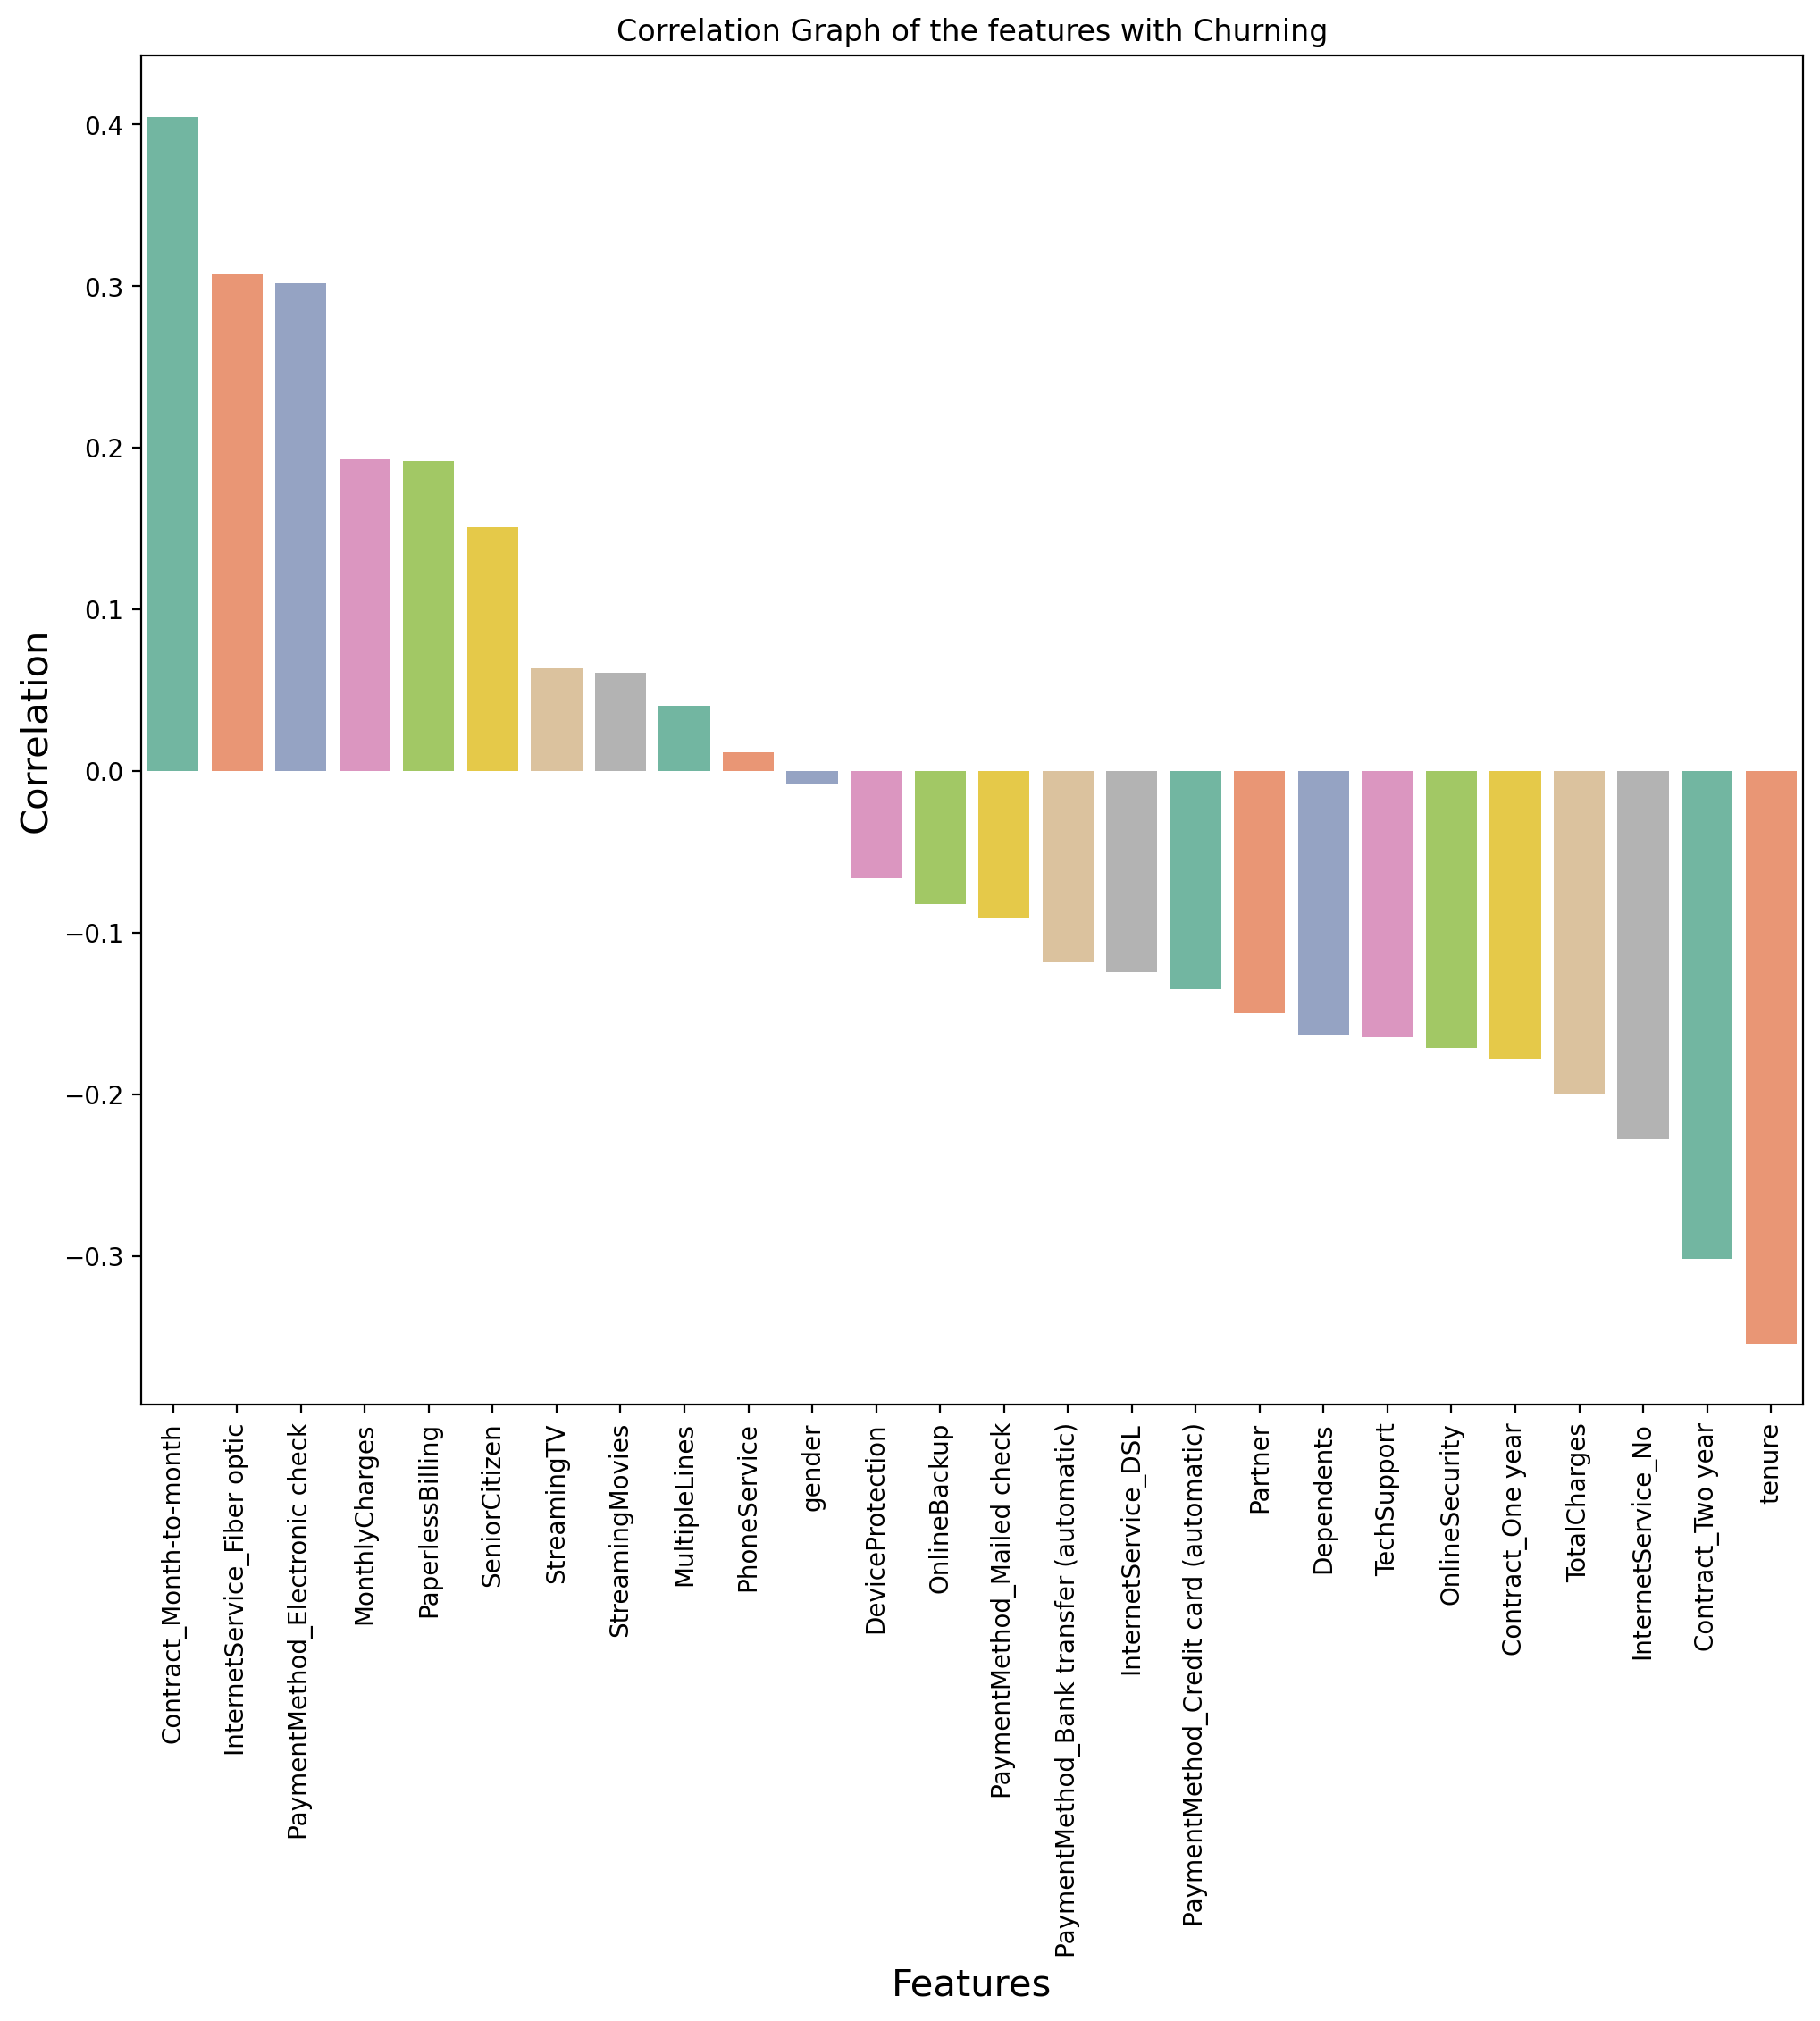

In [41]:
#We will make a barplot of the correlated features
values = telco_df_dummies.corr()['Churn'].sort_values(ascending=False)[1:].values
index = telco_df_dummies.corr()['Churn'].sort_values(ascending=False)[1:].index

#We will create a pallete also 
palette = 'Set2'

#Now we will create the plot
fig, ax = plt.subplots(figsize=(12, 10), dpi=200)
sns.barplot(x=index, y=values, palette=palette,ax=ax)
plt.xticks(rotation=90)
plt.title('Correlation Graph of the features with Churning')
plt.ylabel('Correlation', fontsize=15)
plt.xlabel('Features', fontsize=15)
plt.show()

# Machine Learning modela for predicting churn

# Separating dataset into X and y:

In [42]:
# Separating the base into X and y:
X = telco_df.drop ("Churn", axis = 1)
y = telco_df.Churn


In [106]:
pd.DataFrame(y_train).value_counts()

Churn
0        4130
1        1495
dtype: int64

# In problems like this, where the target class ("churn") is imbalanced (there are much more 0's than 1's), we can achieve better results if we conduct some kind of imbalance treatment. Here we will use Smote technique

In [44]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train, y_train = smote.fit_resample(X,y)

In [45]:
pd.DataFrame(y_train).value_counts()

Churn
0        5163
1        5163
dtype: int64

In [46]:
pd.DataFrame(X_train).value_counts() 

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  PaperlessBilling  MonthlyCharges  TotalCharges  InternetService_DSL  InternetService_Fiber optic  InternetService_No  Contract_Month-to-month  Contract_One year  Contract_Two year  PaymentMethod_Bank transfer (automatic)  PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  PaymentMethod_Mailed check
1       0              0        0           1       1             0              0               0             0                 0            0            0                0                 20.200000       20.200000     0                    0                            1                   1                        0                  0                  0                                        0                                      0                               1                             5
0       0  

## Using the Chi-Sqyare test to check which columsn can be removed

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [47]:
## Using the Chi-Square test to check which columns can be removed

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [48]:
select_kbest_rank_features= SelectKBest(score_func= chi2, k=7)
kbest_features= select_kbest_rank_features.fit(X,y)

df_kscore= pd.DataFrame(kbest_features.scores_,columns=['Score'])
df_columns= pd.DataFrame(X.columns)

kbest_features_rank= pd.concat([df_kscore, df_columns], axis=1)
kbest_features_rank.columns= ['k_score', 'features']

kbest_features_rank
print(kbest_features_rank.sort_values(by='k_score', ascending= False))

          k_score                                 features
15  629630.810349                             TotalCharges
4    16377.328093                                   tenure
14    3653.074681                           MonthlyCharges
19     516.714004                  Contract_Month-to-month
21     486.223101                        Contract_Two year
24     424.113152           PaymentMethod_Electronic check
17     372.082851              InternetService_Fiber optic
18     285.475152                       InternetService_No
20     176.608724                        Contract_One year
7      147.165601                           OnlineSecurity
10     135.439602                              TechSupport
1      133.482766                            SeniorCitizen
3      131.271509                               Dependents
13     104.979224                         PaperlessBilling
23      99.972539    PaymentMethod_Credit card (automatic)
2       81.857769                                  Partn

In [49]:
## Importing the Train Test Split

from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [51]:
## Performing the Standardization on the X train to get the data into a similar scale

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [52]:
scaled_X_train=sc.fit_transform(X_train)
scaled_X_test=sc.fit_transform(X_test)

In [53]:
## Importing the Logistic Regression Algorithm as this is a classification problem

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [54]:
## Fitting the X_train and y_train in the Model

model1=lr.fit(X_train,y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
## Predicting using Model

y_pred=model1.predict(X_test)

In [56]:
## Evaluating using the Accuracy as this is a classification problem

from sklearn.metrics import classification_report

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1099
           1       0.51      0.62      0.56       308

    accuracy                           0.79      1407
   macro avg       0.70      0.73      0.71      1407
weighted avg       0.80      0.79      0.79      1407



In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
cm1=confusion_matrix(y_test,y_pred)

In [59]:
cm1

array([[916, 117],
       [183, 191]], dtype=int64)

In [60]:
## Running the Model with Random Forest

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()


In [61]:
## Fitting the X_train and Y_train on the model

model2=rf.fit(X_train,y_train)

In [62]:
y_pred_mod2=rf.predict(X_test)

In [63]:
print(classification_report(y_test,y_pred_mod2))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [64]:
from sklearn.metrics import confusion_matrix

In [65]:
cm=confusion_matrix(y_pred_mod2,y_pred)

In [66]:
cm

array([[1025,   88],
       [  74,  220]], dtype=int64)

In [67]:
## Running the Model with Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [68]:
## Fitting the X_train and Y_train on the model

model3=dt.fit(X_train,y_train)

In [69]:
y_pred_mod3=dt.predict(X_test)

In [70]:
print(classification_report(y_test,y_pred_mod3))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1033
           1       0.48      0.51      0.49       374

    accuracy                           0.72      1407
   macro avg       0.65      0.65      0.65      1407
weighted avg       0.73      0.72      0.72      1407



In [71]:
cm3=confusion_matrix(y_pred_mod3,y_pred)

In [72]:
cm3

array([[879, 130],
       [220, 178]], dtype=int64)

In [73]:
## KNN Classifier

from sklearn.neighbors import KNeighborsClassifier

In [74]:
model4=KNeighborsClassifier(n_neighbors=4)

In [75]:
model4.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [76]:
y_pred_knn=model4.predict(X_test)

In [77]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86      1033
           1       0.63      0.34      0.44       374

    accuracy                           0.77      1407
   macro avg       0.71      0.63      0.65      1407
weighted avg       0.75      0.77      0.75      1407



In [78]:
cm4=confusion_matrix(y_pred_knn,y_pred)

In [79]:
cm4

array([[1039,  168],
       [  60,  140]], dtype=int64)

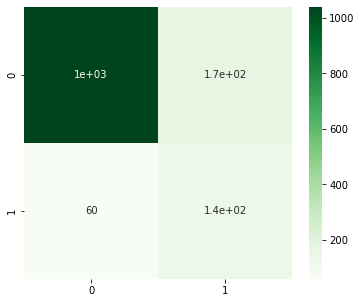

In [80]:
plt.figure(figsize=(6,5))
sns.heatmap(cm4, annot = True, cmap = "Greens");

In [81]:
from sklearn.metrics import accuracy_score

In [82]:
test_error_rates=[]
for k in range(1,30):
    model5=KNeighborsClassifier(n_neighbors=k)
    model5.fit(X_train,y_train)
    y_pred_test=model5.predict(X_test)
    test_error=1-accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Neighbors')

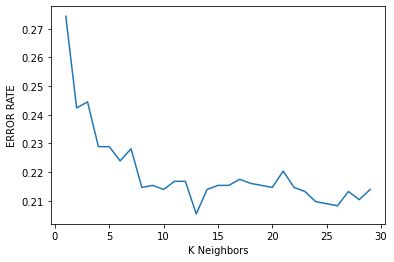

In [83]:
plt.plot(range(1,30),test_error_rates)
plt.ylabel('ERROR RATE')
plt.xlabel('K Neighbors')

In [84]:
from sklearn.naive_bayes import GaussianNB

In [85]:
gb=GaussianNB()

In [86]:
model5=gb.fit(X_train,y_train)

In [87]:
y_pred_mod5=dt.predict(X_test)

In [88]:
print(classification_report(y_test,y_pred_mod5))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1033
           1       0.48      0.51      0.49       374

    accuracy                           0.72      1407
   macro avg       0.65      0.65      0.65      1407
weighted avg       0.73      0.72      0.72      1407



In [89]:
#from xgboost import XGBClassifier


In [90]:
#model_xg = XGBClassifier().fit(X_train, y_train)
#y_pred_xg=model_xg.predict(X_test)

In [91]:
#cm5=confusion_matrix(y_pred_xg,y_pred)

In [92]:
#print(classification_report(y_test,y_pred_xg))

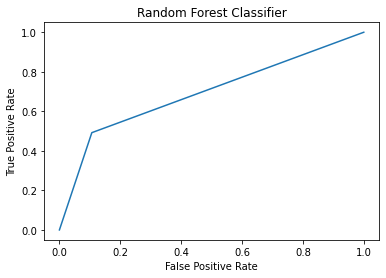

In [93]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

FPR,TPR,_=roc_curve(y_test,y_pred_mod2)
plt.plot(FPR,TPR)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Random Forest Classifier')
plt.show()

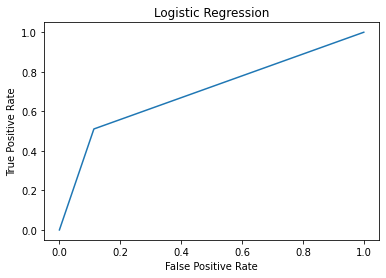

In [94]:
FPR,TPR,_=roc_curve(y_test,y_pred)
plt.plot(FPR,TPR)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Logistic Regression')
plt.show()

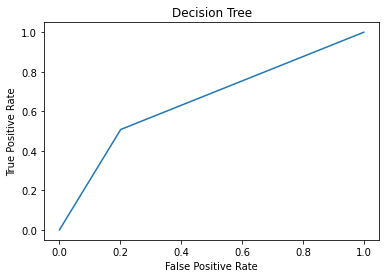

In [95]:
FPR,TPR,_=roc_curve(y_test,y_pred_mod3)
plt.plot(FPR,TPR)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Decision Tree')
plt.show()

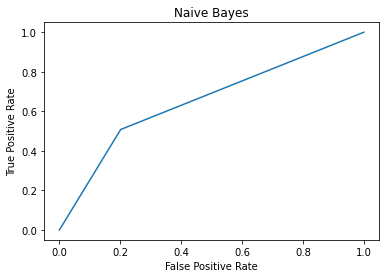

In [96]:
FPR,TPR,_=roc_curve(y_test,y_pred_mod5)
plt.plot(FPR,TPR)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Naive Bayes')
plt.show()

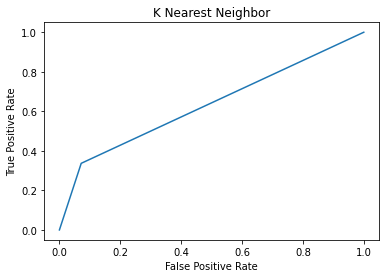

In [97]:
FPR,TPR,_=roc_curve(y_test,y_pred_knn)
plt.plot(FPR,TPR)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('K Nearest Neighbor')
plt.show()

In [98]:
'''FPR,TPR,_=roc_curve(y_test,y_pred_xg)
plt.plot(FPR,TPR)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('XGBoost')
plt.show()'''

"FPR,TPR,_=roc_curve(y_test,y_pred_xg)\nplt.plot(FPR,TPR)\nplt.ylabel('True Positive Rate')\nplt.xlabel('False Positive Rate')\nplt.title('XGBoost')\nplt.show()"

In [99]:
model_lr = LogisticRegression().fit(X_train,y_train)
probs_lr = model_lr.predict_proba(X_test)[:, 1]

model_dt = DecisionTreeClassifier().fit(X_train, y_train)
probs_dt = model_dt.predict_proba(X_test)[:, 1]

model_rf = RandomForestClassifier().fit(X_train, y_train)
probs_rf = model_rf.predict_proba(X_test)[:, 1]

model_knn = KNeighborsClassifier(19).fit(X_train, y_train)
probs_knn = model_knn.predict_proba(X_test)[:, 1]

model_gb=GaussianNB().fit(X_train,y_train)
probs_gb=model_gb.predict_proba(X_test)[:,1]

#model_xg = XGBClassifier().fit(X_train, y_train)
#probs_xg = model_xg.predict_proba(X_test)[:, 1]

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [100]:
from sklearn.metrics import roc_auc_score, roc_curve
#from xgboost import XGBClassifier

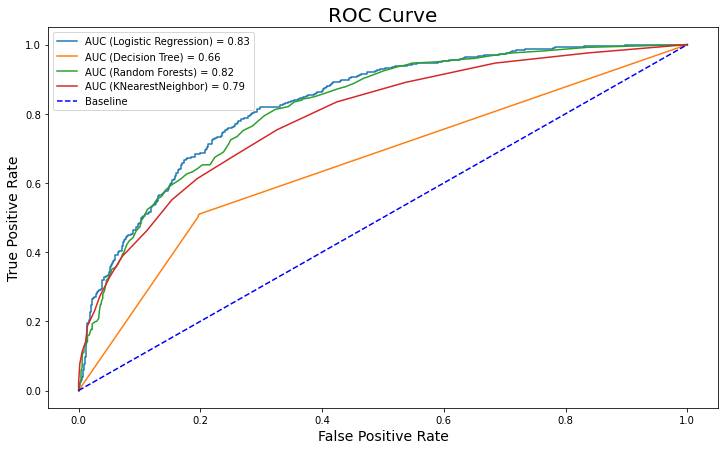

In [101]:
auc_lr = roc_auc_score(y_test, probs_lr)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, probs_lr)

auc_dt = roc_auc_score(y_test, probs_dt)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, probs_dt)

auc_rf = roc_auc_score(y_test, probs_rf)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, probs_rf)

auc_knn = roc_auc_score(y_test, probs_knn)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, probs_knn)

#auc_xg = roc_auc_score(y_test, probs_xg)
#fpr_xg, tpr_xg, thresholds_xg = roc_curve(y_test, probs_xg)

plt.figure(figsize=(12, 7))
plt.plot(fpr_lr, tpr_lr, label=f'AUC (Logistic Regression) = {auc_lr:.2f}')
plt.plot(fpr_dt, tpr_dt, label=f'AUC (Decision Tree) = {auc_dt:.2f}')
plt.plot(fpr_rf, tpr_rf, label=f'AUC (Random Forests) = {auc_rf:.2f}')
plt.plot(fpr_knn, tpr_knn, label=f'AUC (KNearestNeighbor) = {auc_knn:.2f}')
#plt.plot(fpr_xg, tpr_xg, label=f'AUC (XGBoost) = {auc_xg:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();

In [102]:
from sklearn.metrics import precision_recall_curve

In [103]:
precision, recall, thresholds = precision_recall_curve (y_test,y_pred)

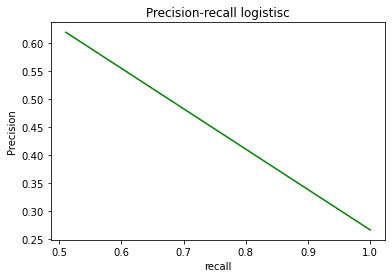

In [104]:
precision, recall, thresholds = precision_recall_curve (y_test,y_pred)

plt.plot (recall[:-1], precision[:-1], color="g")
# plt.xlabel("False Positive Rate")
# plt.axis ([0, 1, 0, 1])
plt.title("Precision-recall logistisc")
plt.xlabel("recall")
plt.ylabel("Precision");